![Python Programming for Scientists in a hurry](./fig/Title_Python.png)

<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 60%; padding: 5px">
  <h1 id="subtitle">Chapter 7. Pandas</h1>
  <h2 id="subtitle">Guillermo Avendaño Franco<br>Aldo Humberto Romero</h2>
  <br>
  <img src="fig/1-line logotype124-295.png" alt="Scientific Computing with Python" style="width:50%" align="left">
  </div>
  <div style="border: none; float: left; width: 30%; padding: 5px">
  <img src="fig/SCPython.png" alt="Scientific Computing with Python" style="width:100%">
  </div>
</div>

## List of Notebooks

Python is a great general-purpose programming language on its own. 
Python is a general purpose programming language. It is interpreted and dynamically typed and is very suited for interactive work and quick prototyping while being powerful enough to write large applications in.
The lesson is particularly oriented to Scientific Computing. 
Other episodes in the series include:

  * Language Syntax
  * Standard Library
  * Scientific Packages
  * NumPy
  * Matplotlib
  * SciPy 
  * **Pandas \[This notebook\]**
  * Cython
  * Parallel Computing

After completing all the series in this lesson you will realize that python has become a powerful environment for scientific computing at several levels, from interactive computing to scripting to big project developments.

## Setup

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2022-08-22T22:14:11.793963-04:00

Python implementation: CPython
Python version       : 3.10.5
IPython version      : 8.4.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 3.10.0-1160.24.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 52
Architecture: 64bit



In [3]:
import os
import time
start = time.time()
chapter_number = 7
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
%watermark -iv

matplotlib: 3.5.3
numpy     : 1.22.4
pandas    : 1.4.3



# Pandas (Data Analysis)

In this tutorial, we will cover:

* Create DataFrames directly and from several file formats
* Extract specific rows and columns

The purpose of this notebook is to show the basic elements that make Pandas a very effective tool for data analysis.
In particular the focus will be on dealing with scientific data rather than a more broad "another dataset" approach 
from most tutorials of this kind.

**pandas** is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. It was created by Wes McKinney. 

**pandas** is a NumFOCUS-sponsored project. It is a well-established API and it is the foundation of several other packages used in data analysis, data mining, and machine learning applications.

Pandas is one of the most often asked questions on Stack Overflow, in part due to its rising popularity but also due to the versatility in manipulating data.

<img src="fig/atlas_Sk4U7xecQ@2x.png" width=500px />

Pandas can be used also in scripts and bigger applications. However, it is easier to learn it from an interactive computing perspective. So we will use this notebook for that purpose. For anything that is not covered here, there are two good resources you need to consider. One is the pandas' webpage and the other one is [stackoverflow.com](http:stackoverflow.com).

The command above exposes all the functionality of pandas under the `pd` namespace. This namespace is optional and its name arbitrary but with time it has been converted into *the-facto* usage.

Pandas deals with basically two kinds of data: Series and Dataframe. Series is just a collection of values like

In [6]:
fibo=pd.Series([1,1,2,3,5,8,13])

In [7]:
fibo

0     1
1     1
2     2
3     3
4     5
5     8
6    13
dtype: int64

In [8]:
#Let us see other example
a={'France':'Paris','Colombia':'Bogota','Argentina':'Buenos Aires','Chile':'Santiago'}
b=pd.Series(a)
print(b)

France              Paris
Colombia           Bogota
Argentina    Buenos Aires
Chile            Santiago
dtype: object


In [9]:
print(b.index)

Index(['France', 'Colombia', 'Argentina', 'Chile'], dtype='object')


In [10]:
#We can also create the list by passing the index as a list
c=pd.Series(['France','Colombia','Argentina','Chile'],index=['Paris','Bogota','Buenos Aires','Santiago'])
print(c)

Paris              France
Bogota           Colombia
Buenos Aires    Argentina
Santiago            Chile
dtype: object


In [11]:
# to look for the 3rd Capital in this list. Remember that here the country name is the indexing
print(b.iloc[2])
# to look for the capital of Argentina
print(b.loc['Argentina'])
# we can use the following but we have to be careful
print(b[2])
#why? because
a={1:'France',2:'Colombia',3:'Argentina',4:'Chile'}
p=pd.Series(a)
#here we will print what happens with index 2, no by the "position 2". For that reason
# it is always better to use iloc when querying a position
print(p[2])


Buenos Aires
Buenos Aires
Buenos Aires
Colombia


In [12]:
data1=['a','b','c','d',None]
pd.Series(data1)

0       a
1       b
2       c
3       d
4    None
dtype: object

In [13]:
#Here we stress that NaN is the same as None but it is number
data2=[1,2,2,3,None]
pd.Series(data2)

0    1.0
1    2.0
2    2.0
3    3.0
4    NaN
dtype: float64

In [14]:
#To see why this is important, let's see what Numpy says about None
import numpy as np
print(np.nan == None)
# more interesting is if we compare np.nan with itself
print(np.nan == np.nan)
#THerefore we need a special function to check the existence of a Nan such as
print(np.isnan(np.nan))

False
False
True


In [15]:
# we can also mix types
a=pd.Series([1,2,3])
print(a)
#now we add a new entry
a.loc['New capital']='None'
print(a)

0    1
1    2
2    3
dtype: int64
0                 1
1                 2
2                 3
New capital    None
dtype: object


Dataframes are tables, consider for example this table with the Boiling Points for common Liquids and Gases at Atmospheric pressure. Data from <https://www.engineeringtoolbox.com/boiling-points-fluids-gases-d_155.html>

| Product | Boiling Point (C) | Boiling Point (F) |
|:--------|:--------------|:----------------------|
|Acetylene 	|-84          | -119|
|Ammonia 	|-35.5  	  | -28.1|
|Ethanol 	| 78.4 	      | 173|
|Isopropyl Alcohol |	80.3  |	177|
|Mercury 	| 356.9 	  | 675.1|
|Methane 	| -161.5 	  | -258.69|
|Methanol	| 66    	  | 151|
|Propane 	| -42.04 	  | -43.67|
|Sulfuric Acid 	| 330 	  | 626|
|Water 	    |100 	      | 212|

This table can be converted into a Pandas Dataframe using a python dictionary as an entry.

In [16]:
temps={'F': [-84, -35.5, 78.4, 80.3, 356.9, -161.5, 66, -42.04, 330, 100], 
       'C':[-119,-28.1, 173, 177, 675.1, -258.69, 151, -43.67, 626, 212]}

In [17]:
pd.DataFrame(temps)

,F,C
0,-84.00,-119.00
1,-35.50,-28.10
2,78.40,173.00
3,80.30,177.00
4,356.90,675.10
5,-161.50,-258.69
6,66.00,151.00
7,-42.04,-43.67
8,330.00,626.00
9,100.00,212.00


**How did that work?**

Each *(key, value)* item in `temps` corresponds to a *column* in the resulting DataFrame.

The **Index** of this DataFrame was given to us on creation as the numbers 0-9.
To complete the table, let's add the names of the substances for which the boiling point was measured.

In [18]:
indices=['Acetylene', 'Ammonia', 'Ethanol', 'Isopropyl Alchol', 
         'Mercury', 'Methane', 'Methanol', 'Propane', 'Sulfuric Acid', 'Water']

In [19]:
boiling = pd.DataFrame(temps, index=indices)
boiling

,F,C
Acetylene,-84.00,-119.00
Ammonia,-35.50,-28.10
Ethanol,78.40,173.00
Isopropyl Alchol,80.30,177.00
Mercury,356.90,675.10
Methane,-161.50,-258.69
Methanol,66.00,151.00
Propane,-42.04,-43.67
Sulfuric Acid,330.00,626.00
Water,100.00,212.00


A pandas data frame arranges data into columns and rows, each column has a tag and each row is identified with an index. If the index is not declared, a number will be used instead.

Before we now play with the data, I would like to stress that one of the differences with NumPy is how we want to manage missing data. Let's see two examples

## Extracting columns and rows

Columns can be extracted using the name of the column, there are two ways of extracting them, as series or as another data frame. As Series will be:

In [20]:
boiling['F']

Acetylene           -84.00
Ammonia             -35.50
Ethanol              78.40
Isopropyl Alchol     80.30
Mercury             356.90
Methane            -161.50
Methanol             66.00
Propane             -42.04
Sulfuric Acid       330.00
Water               100.00
Name: F, dtype: float64

In [21]:
type(_)

pandas.core.series.Series

As data frame, a double bracket is used

In [22]:
boiling[['F']]

,F
Acetylene,-84.00
Ammonia,-35.50
Ethanol,78.40
Isopropyl Alchol,80.30
Mercury,356.90
Methane,-161.50
Methanol,66.00
Propane,-42.04
Sulfuric Acid,330.00
Water,100.00


In [23]:
type(_)

pandas.core.frame.DataFrame

Rows are extracted with the method loc, for example:

In [24]:
boiling.loc['Water']

F    100.0
C    212.0
Name: Water, dtype: float64

In [25]:
type(_)

pandas.core.series.Series

The row can also be returned as a DataFrame using the double bracket notation.

In [26]:
boiling.loc[['Water']] 

,F,C
Water,100.0,212.0


There is another way of extracting columns with a dot notation. It takes the flexibility of Python, pandas is also able to convert the columns as public attributes of the data frame object. Consider this example:

In [27]:
boiling.C

Acetylene          -119.00
Ammonia             -28.10
Ethanol             173.00
Isopropyl Alchol    177.00
Mercury             675.10
Methane            -258.69
Methanol            151.00
Propane             -43.67
Sulfuric Acid       626.00
Water               212.00
Name: C, dtype: float64

In [28]:
type(_)

pandas.core.series.Series

The (dot) notation only works if the names of the columns have no spaces, otherwise only the bracket column extraction applies.

In [29]:
df=pd.DataFrame({'case one': [1], 'case two': [2]})

In [30]:
df['case one']

0    1
Name: case one, dtype: int64

The location and extraction methods in Pandas are far more elaborated than just the examples above. Most data frames that are created in actual applications are not created from dictionaries but actual files.

## Read data

It’s quite simple to load data from various file formats into a DataFrame. In the following examples, we'll create data frames from several usual formats.

### From CSV files

CSV stands for "comma-separated values". Its data fields are most often separated, or delimited, by a comma. For example, let's say you had a spreadsheet containing the following data.

CSV is a simple file format used to store tabular data, such as a spreadsheet or one table from a relational database. Files in the CSV format can be imported to and exported from programs that store data in tables, such as Microsoft Excel or OpenOffice Calc.

Being a text file, this format is not recommended when dealing with extremely large tables or more complex data structures, due to the natural limitations of the text format.

In [31]:
df = pd.read_csv('data/heart.csv')

This is a table downloaded from <https://www.kaggle.com/ronitf/heart-disease-uci>. The table contains several columns related to the presence of heart disease in a list of patients. In real applications, tables can be extremely large to be seen as complete. Pandas offer a few methods to get a quick overview of the contents of a DataFrame

In [32]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [33]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [34]:
df.shape

(303, 14)

In [35]:
df.size

4242

In [36]:
df.loc[:,['age', 'sex']]

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0
...,...,...
298,57,0
299,45,1
300,68,1
301,57,1


In [37]:
# adding a new column
df["new column"]=None
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new column
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,None
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,None
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,None
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,None
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,None


In [38]:
# dropping one column (also works with rows)
del df["new column"]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
# Becareful if you make copies and modify the data
df1=df["age"]
df1 += 1
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,64,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,38,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,42,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,57,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,58,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
# if you are not in windows. you can communicate with the operating system
!cat data/heart.csv

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
58,0,3,150,283,1,0,162,0,1,2,0,2,1
50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
58,0,2,120,340,0,1,172,0,0,2,0,2,1
66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
42,1,0,140,226,0,1,178,0,0,2,0,2,1
61,1,2,150,243,1,1,137,1,1,1,0,2,1
40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
71,0,

In [41]:
# if you want to read the CSV file but you want to skip the first 3 lines
df = pd.read_csv('data/heart.csv',skiprows=3)
df.head()

,41,0,1,130,204,0.1,0.2,172,0.3,1.4,2,0.4,2.1,1.1
0,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
1,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
3,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
4,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


In [42]:
# if we want to use the first column as the index
df = pd.read_csv('data/heart.csv',index_col=0,skiprows=3)
df.head()

,0,1,130,204,0.1,0.2,172,0.3,1.4,2,0.4,2.1,1.1
41,,,,,,,,,,,,,
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


### From JSON Files

JSON (JavaScript Object Notation) is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate. It is based on a subset of the JavaScript Programming Language, Standard ECMA-262 3rd Edition - December 1999. JSON is a text format that is completely language-independent but uses conventions that are familiar to programmers of the C-family of languages, including C, C++, C#, Java, JavaScript, Perl, Python, and many others. These properties make JSON an ideal data-interchange language.

JSON is particularly useful for Data Analysis on Python as the JSON parser is part of the Standard Library and its format looks very similar to Python dictionaries. However, notice that a JSON file or JSON string is just a set of bytes that can be read as text. A python dictionary is a complete data structure. Other differences between JSON strings and dictionaries are:

 * Python's dictionary key can hash any object, and JSON can only be a string.
 * The Python dict string can be created with single or double quotation marks. When represented on the screen, single quotes are used, however, a JSON string enforces double quotation marks.
 * You can nest tuple in Python dict. JSON can only use an array.
 
In practice, that means that a JSON file can always be converted into a Python dictionary, but the reverse is not always true.

In [43]:
df=pd.read_json("data/heart.json")

### From SQLite Databases

SQLite is a C-language library that implements a small, fast, self-contained, high-reliability, full-featured, SQL database engine. SQLite is the most used database engine in the world. In practice, SQLite is a serverless SQL database in a file.

In [44]:
import sqlite3

In [45]:
con = sqlite3.connect("data/heart.db")

In [46]:
df = pd.read_sql_query("SELECT * FROM heart", con)

In [47]:
df.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### From Excel files

Pandas also support reading Excel files, however, to read files from recent versions of Excel. You need to install the **xlrd** package 

In [48]:
#pip install xlrd

If you are using conda, the package can be installed with:

In [49]:
#conda install xlrd

After the package has been installed, pandas can read the Excel files version >= 2.0

In [50]:
df=pd.read_excel('data/2018_all_indicators.xlsx')

### From other formats

Pandas is very versatile in accepting a variety of formats: STATA, SAS, HDF5 files. See <https://pandas.pydata.org/pandas-docs/stable/reference/io.html> for more information on the multiple formats supported.

## Write DataFrames

Pandas also offers the ability to store resulting DataFrames back into several formats. Consider this example:
    

In [51]:
heart = pd.read_csv('data/heart.csv')

Saving the data frame in those formats execute:

In [52]:
if os.path.isfile("new_heart.db"):
    os.remove("new_heart.db")

heart.to_csv('new_heart.csv')

heart.to_json('new_heart.json')

con = sqlite3.connect("new_heart.db")
heart.to_sql('heart', con)

os.remove("new_heart.csv")
os.remove("new_heart.json")
os.remove("new_heart.db")

## View the data

We already saw how to use **tail** and **head** to get a glimpse into the initial and final rows. The default is 5 rows, but the value can be modified.

In [53]:
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [54]:
heart.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Another method is **info** to see the columns and the type of values stored on them. In general, Pandas try to associate a numerical value when possible. However, it will revert into datatype **object** when mixed values are found.

In [55]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In this particular case, the table is rather clean, with all columns populated. It is often the case where some columns have missing data, we will deal with them in another example.

Another way to query the database and mask some of the results can be by using boolean operations. Let's see some examples

In [56]:
# here we select all people with heart conditions and older than 50
#print(heart.isna)
only50 = heart.where(heart['age'] > 50)
print(only50.head())
#only people that has the condition has values, the other has NaN as entries
#NaN are not counted or used in statistical analysis of the data frame. 
count1=only50['age'].count()
count2=heart['age'].count()
print('Values with NoNaNs in only50 ',count1,' and in the whole database', count2)
only50real=only50.dropna()
print(only50real.head())
# we can delete all rows with NaN as


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  3.0     145.0  233.0  1.0      0.0    150.0    0.0      2.3   
1   NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
2   NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
3  56.0  1.0  1.0     120.0  236.0  0.0      1.0    178.0    0.0      0.8   
4  57.0  0.0  0.0     120.0  354.0  0.0      1.0    163.0    1.0      0.6   

   slope   ca  thal  target  
0    0.0  0.0   1.0     1.0  
1    NaN  NaN   NaN     NaN  
2    NaN  NaN   NaN     NaN  
3    2.0  0.0   2.0     1.0  
4    2.0  0.0   2.0     1.0  
Values with NoNaNs in only50  208  and in the whole database 303
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  3.0     145.0  233.0  1.0      0.0    150.0    0.0      2.3   
3  56.0  1.0  1.0     120.0  236.0  0.0      1.0    178.0    0.0      0.8   
4  57.0  0.0  0.0     120.0  354.0  0.0      1.0    163.0    

In [57]:
# we can avoid all this problem is we use
only50 = heart[heart['age']>50]
print(only50.head())
# but now we can do it more complex, for example, people older than 50 with cholesterol larger than 150
only50 = heart[(heart['age']>50) & (heart['chol'] > 150)]

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   

   ca  thal  target  
0   0     1       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  


In [58]:
#we can also order things promoting a column to be the index
heart1=heart.set_index('age')
print(heart1.head())
# we can also come back to the original index and move the existing index to a new column
heart1=heart1.reset_index()
print(heart1.head())
# for binary we can alw

     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
age                                                                          
63     1   3       145   233    1        0      150      0      2.3      0   
37     1   2       130   250    0        1      187      0      3.5      0   
41     0   1       130   204    0        0      172      0      1.4      2   
56     1   1       120   236    0        1      178      0      0.8      2   
57     0   0       120   354    0        1      163      1      0.6      2   

     ca  thal  target  
age                    
63    0     1       1  
37    0     2       1  
41    0     2       1  
56    0     2       1  
57    0     2       1  
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0      

In [59]:
# There is a cool idea in Pandas which is hierarchical indexes.. for example, 
case1 = pd.Series({'Date': '2020-05-01','Class': 'class 1','Value': 1})
case2 = pd.Series({'Date': '2020-05-01','Class': 'class 2','Value': 2})
case3 = pd.Series({'Date': '2020-05-02','Class': 'class 1','Value': 3})
case4 = pd.Series({'Date': '2020-05-03','Class': 'class 1','Value': 4})
case5 = pd.Series({'Date': '2020-05-03','Class': 'class 2','Value': 5})
case6 = pd.Series({'Date': '2020-05-04','Class': 'class 1','Value': 6})


df=pd.DataFrame([case1,case2,case3,case4,case5,case6])
print(df.head())


         Date    Class  Value
0  2020-05-01  class 1      1
1  2020-05-01  class 2      2
2  2020-05-02  class 1      3
3  2020-05-03  class 1      4
4  2020-05-03  class 2      5


In [60]:
df = df.set_index(['Date', 'Class'])
print(df.head())



                    Value
Date       Class         
2020-05-01 class 1      1
           class 2      2
2020-05-02 class 1      3
2020-05-03 class 1      4
           class 2      5


## Checking and removing duplicates

Another important check to perform on DataFrames is search for duplicated rows. Let's continue using the 'hearth' data frame and search duplicated rows.

In [61]:
heart.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

The answer is a pandas series indicating if the row is duplicated or not. Let's see the duplicates:

In [62]:
heart[heart.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Two contiguous rows are identical. Most likely a human mistake entering the values. We can create a new DataFrame with one of those rows removed

In [63]:
heart_nodup = heart.drop_duplicates()

heart_nodup.shape

(302, 14)

Compare with the original DataFrame:

In [64]:
heart.shape

(303, 14)

## Dataset Merging

In [65]:
# There is a cool idea in Pandas which is hierarchical indexes.. for example, 
case1 = pd.Series({'Date': '2020-05-01','Class': 'class 1','Value': 1})
case2 = pd.Series({'Date': '2020-05-01','Class': 'class 2','Value': 2})
case3 = pd.Series({'Date': '2020-05-02','Class': 'class 1','Value': 3})
case4 = pd.Series({'Date': '2020-05-03','Class': 'class 1','Value': 4})
case5 = pd.Series({'Date': '2020-05-03','Class': 'class 2','Value': 5})
case6 = pd.Series({'Date': '2020-05-04','Class': 'class 1','Value': 6})


df=pd.DataFrame([case1,case2,case3,case4,case5,case6])
print(df.head())

         Date    Class  Value
0  2020-05-01  class 1      1
1  2020-05-01  class 2      2
2  2020-05-02  class 1      3
3  2020-05-03  class 1      4
4  2020-05-03  class 2      5


In [66]:
df['Book']=['book 1','book 2','book 3','book 4','book 5','book 6']
print(df.head())

         Date    Class  Value    Book
0  2020-05-01  class 1      1  book 1
1  2020-05-01  class 2      2  book 2
2  2020-05-02  class 1      3  book 3
3  2020-05-03  class 1      4  book 4
4  2020-05-03  class 2      5  book 5


In [67]:
# A different method use index as the criteria
newdf=df.reset_index()
newdf['New Book']=pd.Series({1:'New Book 1',4:'New Book 4'})
print(newdf.head())

   index        Date    Class  Value    Book    New Book
0      0  2020-05-01  class 1      1  book 1         NaN
1      1  2020-05-01  class 2      2  book 2  New Book 1
2      2  2020-05-02  class 1      3  book 3         NaN
3      3  2020-05-03  class 1      4  book 4         NaN
4      4  2020-05-03  class 2      5  book 5  New Book 4


In [68]:
# Let see how Merge works


## Plotting

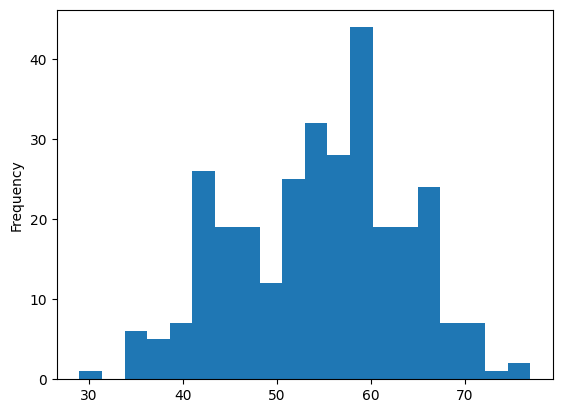

In [69]:
%matplotlib inline
heart['age'].plot.hist(bins=20);

In [70]:
import seaborn as sns

In [71]:
h4=heart[['age', 'trestbps', 'chol', 'thalach']]
goal=[ 'no heart disease' if x==1 else 'heart disease' for x in heart['target'] ]
h5=h4.join(pd.DataFrame(goal, columns=['goal']))

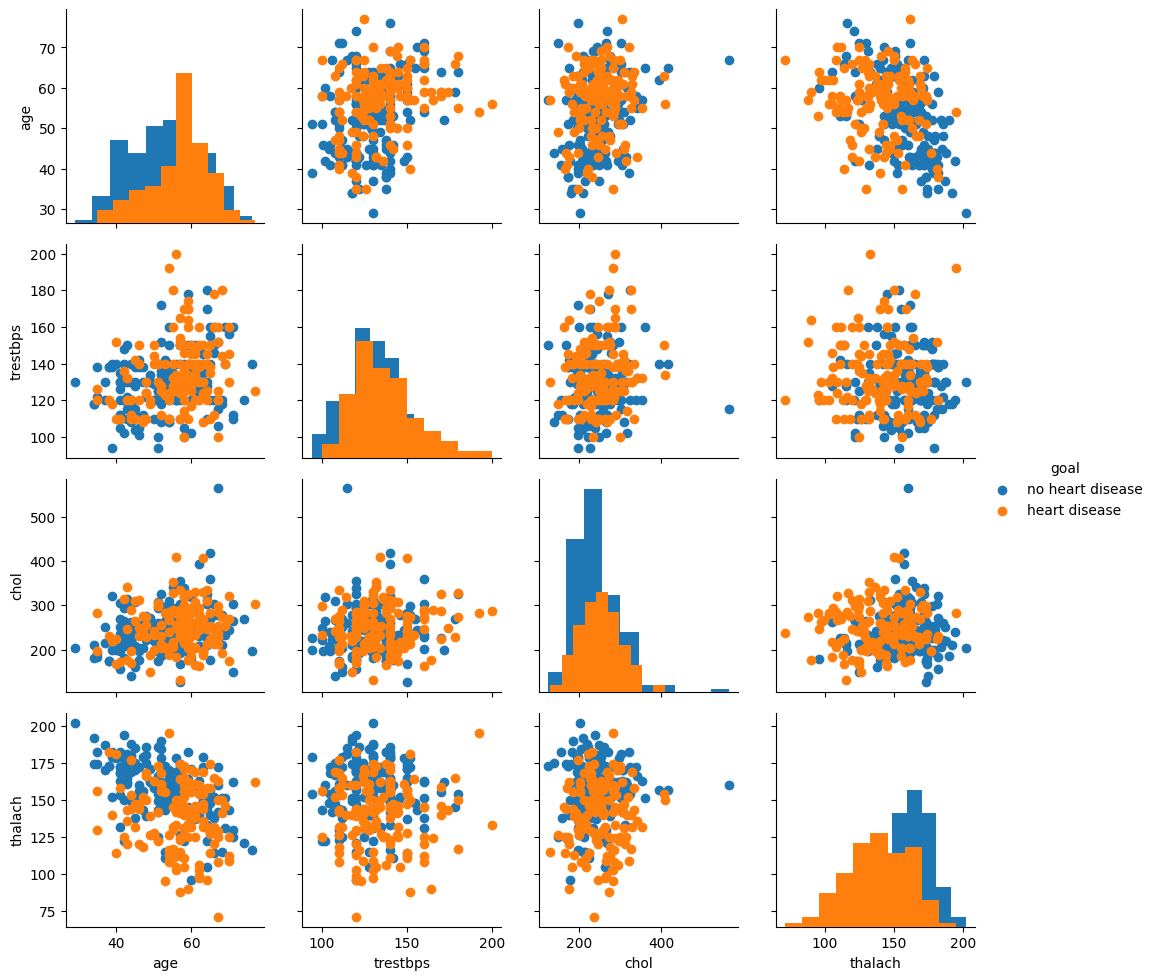

In [72]:
import matplotlib.pyplot as plt

g = sns.PairGrid(h5, hue="goal")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

# Acknowledgments and References

This Notebook has been adapted by **Guillermo Avendaño** (WVU), **Jose Rogan** (Universidad de Chile) and **Aldo Humberto Romero** (WVU) from the [Tutorials for Stanford cs228 and cs231n](https://github.com/kuleshov/cs228-material). A large part of the info was also built from scratch. In turn, that material was adapted by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/). Another good resource, in particular, if you want to just look for an answer to specific questions is [planetpython.org](http:planetpython.org), in particular for data science.

Changes to the original tutorial include strict Python 3 formats and a split of the material to fit a series of lessons on Python Programming for WVU's faculty and graduate students.

The support of the National Science Foundation and the US Department of Energy under projects: DMREF-NSF 1434897, NSF OAC-1740111 and DOE DE-SC0016176 is recognized.

<div style="clear: both; display: table;">
<div style="border: none; float: left; width: 40%; padding: 10px">
<img src="fig/NSF.jpg" alt="National Science Foundation" style="width:50%" align="left">
    </div>
    <div style="border: none; float: right; width: 40%; padding: 10px">
<img src="fig/DOE.jpg" alt="National Science Foundation" style="width:50%" align="right">
</div>

# Back of the Book

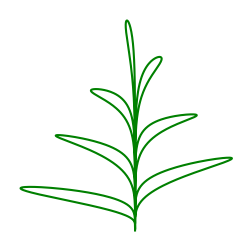

In [73]:
plt.figure(figsize=(3,3))
n = chapter_number
maxt=(2*(n-1)+3)*np.pi/2
t = np.linspace(np.pi/2, maxt, 1000)
tt= 1.0/(t+0.01)
x = (maxt-t)*np.cos(t)**3
y = t*np.sqrt(np.abs(np.cos(t))) + np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [74]:
end = time.time()
print(f'Chapter {chapter_number} run in {int(end - start):d} seconds')

Chapter 7 run in 15 seconds
